In [6]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Read in the data

df = pd.read_csv('/Users/sabrina/Downloads/movies.csv')


In [7]:
#Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
#Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [26]:
df = df.dropna()

In [9]:
#Data types per column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#Changing data types

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [51]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0,1980
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0,1980


In [28]:
#Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [29]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


In [54]:
#Sorting by highest grossing movies

df.head().sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0,1980
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0,1980


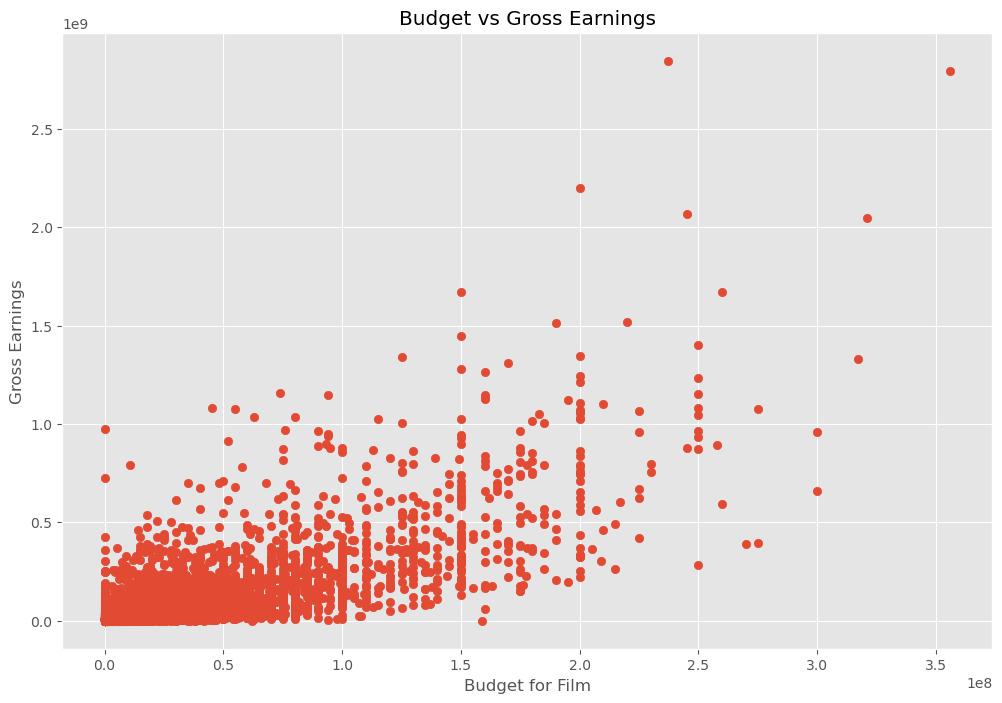

In [35]:
#Building scatterplot: budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

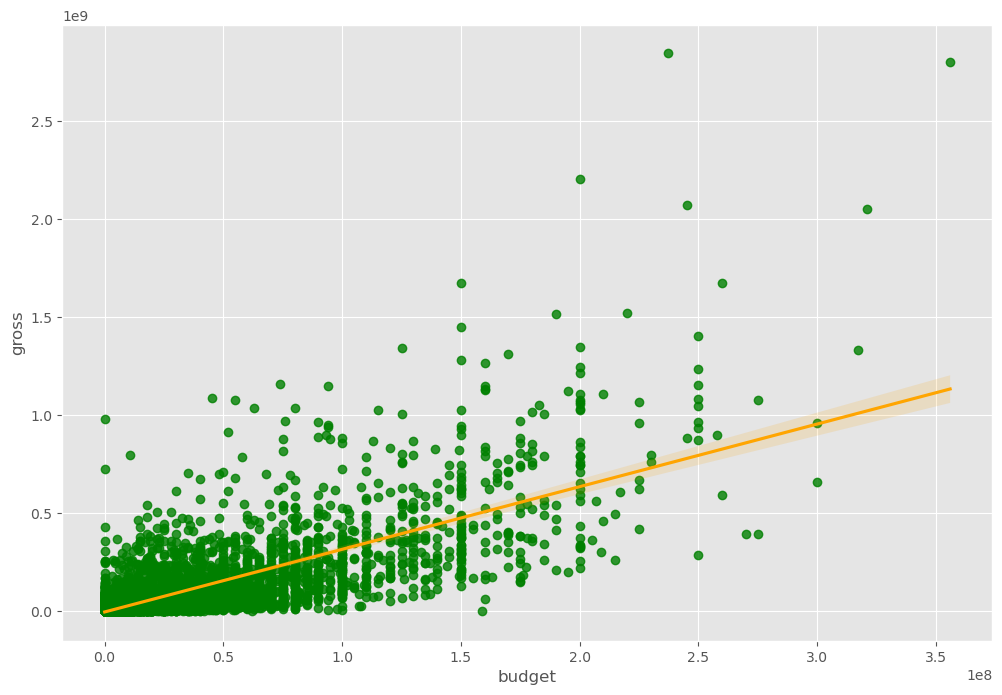

In [40]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color": "orange"})

In [41]:
#Looking at correlation

df.corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042,0.305530
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942,0.257703
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.257703,0.120370,1.000000


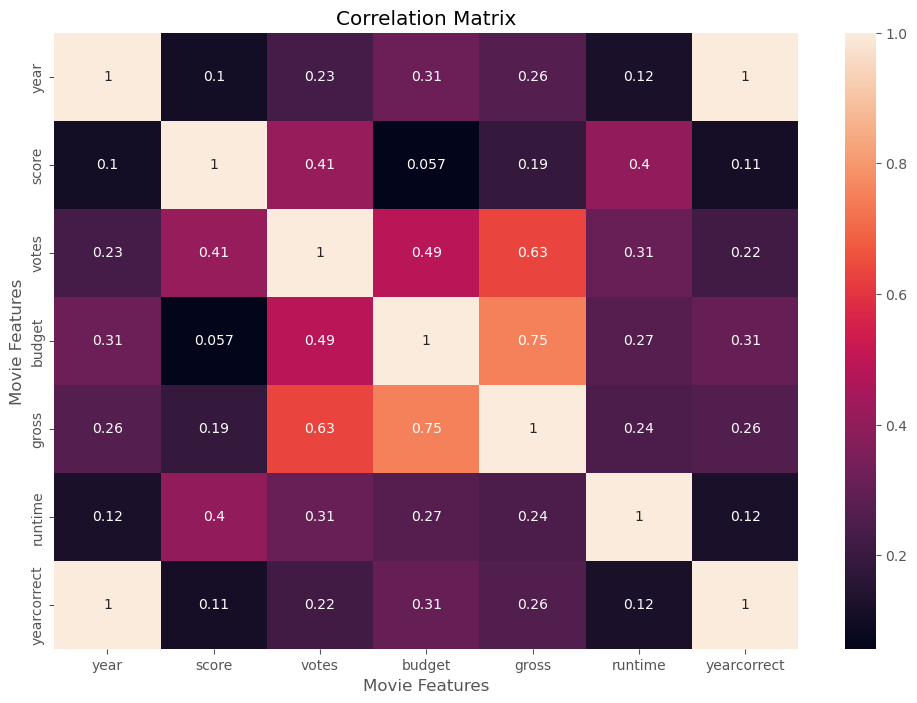

In [43]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [53]:
#Looking at other columns

df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name]= df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0,1980
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0,1980


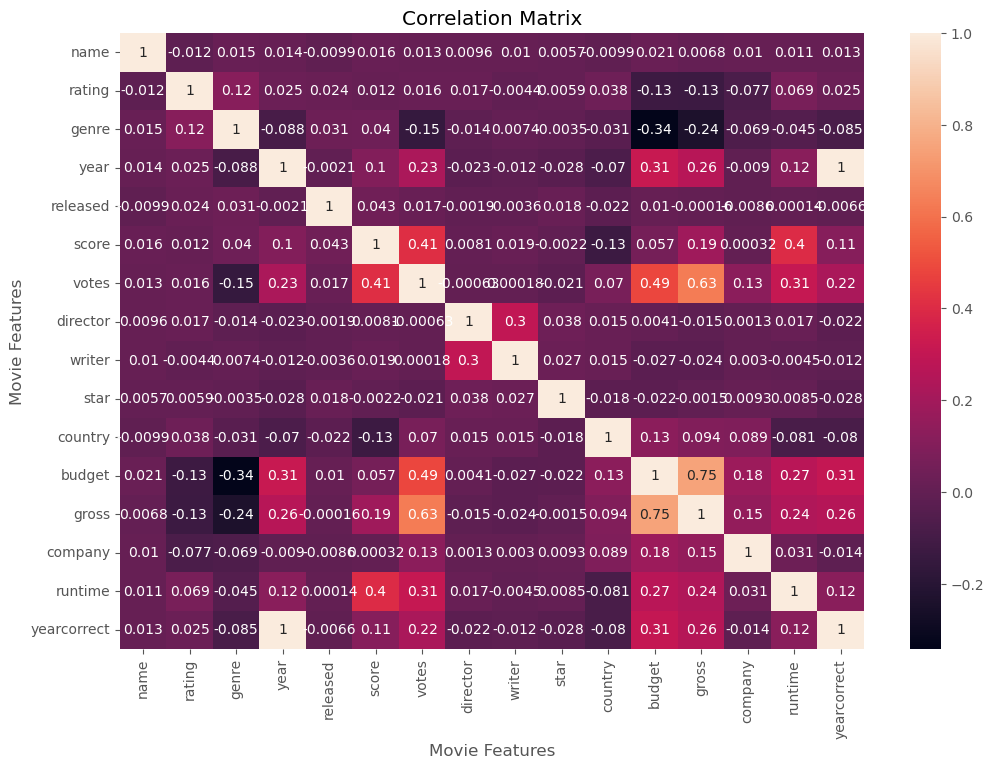

In [45]:
correlation_matrix = df_num.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [46]:
correlation_mat = df_num.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011924
             genre          0.015300
             year           0.013514
             released      -0.009906
             score          0.016181
             votes          0.013180
             director       0.009608
             writer         0.010217
             star           0.005685
             country       -0.009939
             budget         0.020825
             gross          0.006817
             company        0.010073
             runtime        0.011151
             yearcorrect    0.012711
rating       name          -0.011924
             rating         1.000000
             genre          0.117566
             year           0.024989
             released       0.024319
             score          0.011538
             votes          0.016086
             director       0.017205
             writer        -0.004387
             star           0.005905
             country        0.037738
 

In [47]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.342064
genre        budget        -0.342064
             gross         -0.240903
gross        genre         -0.240903
votes        genre         -0.148420
genre        votes         -0.148420
score        country       -0.130094
country      score         -0.130094
rating       gross         -0.128910
gross        rating        -0.128910
budget       rating        -0.126806
rating       budget        -0.126806
genre        year          -0.088172
year         genre         -0.088172
yearcorrect  genre         -0.084559
genre        yearcorrect   -0.084559
runtime      country       -0.081464
country      runtime       -0.081464
             yearcorrect   -0.080397
yearcorrect  country       -0.080397
rating       company       -0.076807
company      rating        -0.076807
year         country       -0.070266
country      year          -0.070266
genre        company       -0.068678
company      genre         -0.068678
runtime      genre         -0.044631
g

In [49]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632987
gross        votes          0.632987
budget       gross          0.750562
gross        budget         0.750562
yearcorrect  year           0.997466
year         yearcorrect    0.997466
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64